<a href="https://colab.research.google.com/github/gracieleo/programaria-analise-dados/blob/master/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução 🖥️


O objetivo dessa analise de dados é duplo: em primeiro lugar, buscamos aprender e praticar técnicas de analise de dados utilizando Python e bibliotecas como Pandas, Matplotlib e Seaborn. Em segundo lugar, pretendemos extrair insights importantes sobre o mercado de trabalho na área de TI, identificando padrões, tendências e correlações nos dados coletados.<br>
Além de explorar aspectos como salários, níveis escolaridade e tecnologias mais utilizadas, daremos um foco especial ao debate de diversidade, investigando questões de representatividade de gênero e raça no campo da tecnologia.<br>
Vamos começar nossa jornada de exploração dos dados e descobertas!

# Importações ⬇

In [117]:
from google.colab import drive
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import sqlite3

# Uso da biblioteca Pandas 🐼

Saber essas informações iniciais dos nossos dados é bem importante para termos
um ponto de partida para a análise, vamos entender tudo muito melhor durante o curso, mas se eu já vejo de cara que tenho uma coluna praticamente vazia, já me diz que provavelmente será melhor apagá-la ou, se ela for muito importante, volte com o tempo e ver como seria possível coletar mais informações para preencher essa informação. Saber de cara se eu tenho muitos ou poucos dados também ajuda a definir estratégias para a análise ou decidir se é possível fazer uma análise em si.👩🏻‍💻

In [118]:
# Leitura dos dados
dados = pd.read_excel('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/planilha_modulo3.xlsx')

In [119]:
dados

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,4266,01jnrn9f6va0menfhk2ztm01jnrn96bp,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 7 a 10 anos,4329.0
4267,4267,01dyfxam4u4bi29fem01dyfxaq9akvqp,30.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3758.0
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0


In [120]:
# visulizar as primeiras linhas de uma tab
dados.head(10)

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
6,6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Menos de 1 ano,4491.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
8,8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,7112.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0


In [121]:
# visualizar as últimas linhas da tab
dados.tail(3)

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4268,4268,00zw9ks9d40z4u00zz3d20iix65qpli3,29.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Imobiliário/ Construção Civil,de 101 a 500,1.0,Gerente/Head,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,19607.0
4269,4269,00xu7yujd7s57emj00xu7y0c3njix3de,NaN,17-21,Masculino,Branca,Não,NaN,NaN,True,...,Indústria,de 1.001 a 3.000,0.0,NaN,Outra Opção,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,989.0
4270,4270,00lb35llmdsidpa00lb35qcdysnzvhv7,24.0,22-24,Masculino,Branca,Não,NaN,NaN,True,...,Agronegócios,de 501 a 1.000,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,3079.0


In [122]:
# mostrar tamanho da tab em [linhas x colunas]
dados.shape

(4271, 28)

In [123]:
# tamanho da tab em linhas
len(dados)

4271

In [124]:
# nomes das colunas
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [125]:
# informações das colunas da tab - qtd de dados não nulos, tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [126]:
# descrição de colunas com dados númericos
dados.describe()

,Unnamed: 0,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4271.000000,4197.000000,4171.000000,3694.000000,3694.000000
mean,2135.000000,31.169168,0.806281,0.193016,10969.266919
std,1233.075829,6.902803,0.395258,0.394719,19419.753189
min,0.000000,18.000000,0.000000,0.000000,35.000000
25%,1067.500000,26.000000,1.000000,0.000000,4269.500000
50%,2135.000000,30.000000,1.000000,0.000000,7625.500000
75%,3202.500000,35.000000,1.000000,0.000000,12778.500000
max,4270.000000,54.000000,1.000000,1.000000,485191.000000


# Repetindo análise do excel 📗

#### Análise - Filtro por GENERO

In [127]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [128]:
# apenas os que responderam 'Feminino'
dados[dados['GENERO']=='Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [129]:
# os que responderam 'Feminino' e/ou algum outro valor como exemplo 'Prefiro não responder'
dados[dados['GENERO']!='Masculino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [130]:
# Filtrar por algum texto ('Prefiro não informar') dentro da coluna GENERO
dados[dados['GENERO'].str.contains('não', na=False)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


#### Análise - Filtro por IDADE

In [131]:
dados[dados['IDADE']>=30]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


#### Análise - Filtro por IDADE > 30 e GENERO = Feminino

In [132]:
dados[(dados['IDADE']>30) & (dados['GENERO']=='Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


#### Análise - Filtro por COR|RAÇA|ETNIA = Indígena e GENERO = Feminino

In [133]:
dados[(dados['COR/RACA/ETNIA']=='Indígena') & (dados['GENERO']=='Feminino') ]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
733,733,tzt6opz4617fnyutzt6oyhgwzguk5m5k,32.0,30-34,Feminino,Indígena,Não,"Sim, acredito que a minha a experiência profis...","Aprovação em processos seletivos/entrevistas, ...",False,...,Telecomunicação,Acima de 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10883.0
794,794,thhy7uep2tgbfhz6avw7thhy79g30z1n,36.0,35-39,Feminino,Indígena,Não,"Sim, acredito que a minha a experiência profis...",Oportunidades de progressão de carreira,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Contagem por valores únicos de NIVEL (cargo)

In [134]:
dados['NIVEL'].nunique()

3

#### Agrupamento por coluna especifica, traz a quantidade por linha

In [135]:
dados.groupby('REGIAO ONDE MORA')['ID'].nunique()

,ID
REGIAO ONDE MORA,
Centro-oeste,222
Nordeste,562
Norte,76
Sudeste,2642
Sul,668


In [136]:
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [137]:
# traz também os valores nulos
dados.groupby('GENERO',dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


#### Quantas ocorrencias na colunas informada

In [138]:
dados['REGIAO ONDE MORA'].value_counts()

,count
REGIAO ONDE MORA,
Sudeste,2642
Sul,669
Nordeste,562
Centro-oeste,222
Norte,76


In [139]:
dados['GENERO'].value_counts(dropna=False)

,count
GENERO,
Masculino,3194
Feminino,1056
Prefiro não informar,12
NaN,9


#### Filtro por COR|RACA|ETNIA contando quantas pessoas por NOVO NIVEL são da cor Preta

In [140]:
dados[dados['COR/RACA/ETNIA']=='Preta']['NIVEL'].value_counts()

,count
NIVEL,
Júnior,98
Pleno,69
Sênior,39


### Pivot table
Cria tabelas dinâmicas no Pandas. Ela recebe como parâmetros a tabela e “pivota”/transforma a tabela cruzando as linhas e colunas passadas com a função de agregação escolhida. É uma ferramenta muito útil em várias situações para simplificar os dados e facilitar a análise.

In [141]:
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Estatistica Básica 🔢


In [142]:
lista_idades = [26,30,32,22,26,35,40,20,43,31,23]

In [143]:
soma_idades = np.sum(lista_idades)

In [144]:
qtd_idades = len(lista_idades)

In [145]:
media_idades = soma_idades/qtd_idades

In [146]:
media_idades

np.float64(29.818181818181817)

##### **Mean** usando uma função pronta para MÉDIA
Representa o valor central dos dados. É calculada pela soma de todos os valores e divisão pela quantidade de valores.

*   pandas - dados["IDADE"].mean() 'de uma coluna'
*   numpy - np.mean() 'de uma lista'

In [147]:
media = np.mean(lista_idades)
print('Media aritmetica: ', media)

Media aritmetica:  29.818181818181817


####  **Median** Mediana
Valor central dos dados ordenados. Menos afetada por valores extremos ("outliers").

* np.median() calcula a mediana em listas do NumPy.
* dados["IDADE"].median() calcula a mediana da coluna "IDADE" no Pandas



In [148]:
# 1 ordenar a lista
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [149]:
# adicionando um valor a mais na lista
lista_idades = [26,30,32,22,26,35,40,20,43,31,23, 100]

In [150]:
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [151]:
# 2 Calculando a mediana
mediana = np.median(lista_idades)
print('A mediana: ', mediana)

A mediana:  30.5


#### Voltando para a tabela

In [152]:
# Média
media = dados['IDADE'].mean()
print('Média de idades: ', media)

Média de idades:  31.169168453657374


In [153]:
# Mediana
mediana = dados['IDADE'].median()
print('Mediana de idades: ', mediana)

Mediana de idades:  30.0


In [154]:
# Moda - Valor que aparece mais frequentemente nos dados
moda = dados['IDADE'].mode()
print('Moda das idades: ', moda)

Moda das idades:  0    27.0
Name: IDADE, dtype: float64


In [155]:
# Desvio Padrão: Mede a dispersão dos dados em relação à média
# mais proximo de zero - mais homegeneos os dados são
desvio = dados['IDADE'].std()
print('Desvio padrão: ', desvio)

Desvio padrão:  6.902802832143141


In [156]:
# Min e Max
dados["IDADE"].min()

18.0

In [157]:
dados["IDADE"].max()

54.0

In [158]:
# Média idades por genero
feminino = dados[dados['GENERO']=='Feminino']['IDADE'].mean()
print('média de idades genro feminino: ', feminino)

masculino = dados[dados['GENERO']=='Masculino']['IDADE'].mean()
print('média de idades genro masculino: ', masculino)

média de idades genro feminino:  31.318051575931232
média de idades genro masculino:  31.147876077930373


In [159]:
# Analise média salarial por genero
sal_feminino = dados[dados['GENERO']=='Feminino']['SALARIO'].mean()
print('Media salarial genero feminino: ', sal_feminino)

sal_masculino = dados[dados['GENERO']=='Masculino']['SALARIO'].mean()
print('Media salarial genero masculino: ', sal_masculino)

Media salarial genero feminino:  8673.22460496614
Media salarial genero masculino:  11724.552688172043


# Valores faltantes 🤦




1 - Olhar os dados faltantes: <br>
isna() - retorna um DataFrame booleano, onde cada valor é True se o dado for ausente e False caso contrário.  dados.isna()

*info()* nos dá uma visão geral dos dados, incluindo a contagem de valores não nulos em cada coluna.
dados.info() <br>

2 - Tratar os dados faltantes - não há um único método para tratar valores nulos. Podemos:<br>
df.dropna() - Deletar <br>
df['COLUNA'].fillna('valor') - Substituir

In [160]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

#### Trabalhando coluna de gênero

In [161]:
# visualizar quantos/quais valores nulos
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [162]:
# preenchendo as linhas de valore nulos com alguma informação
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

In [163]:
# valore da coluna 'GENERO' após o preenchimento dos valores nulos
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


#### Trabalhando coluna de idade

In [164]:
# True = valores nulos
# False = tem valores
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


Temos duas colunas referentes a idade a coluna **IDADE** e a **FAIXA IDADE** pode ser que a pessoas não tenha preenchido a idade exata, mas preencheu a faixa

In [165]:
# Filtrar todos os valores nulos da coluna IDADE
# Contar a qtd de pessoas por faixa de idade
# Resultado é a qtd de pessoas que não responderam IDADE agrupadas por FAIXA IDADE
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


Avaliando o resultado acima, podemos agora tirar a **média** de idade do grupo entre 17-21 anos e outra para 55+ e assim substituir esse novo valor de média idade para os 74 valores faltantes/que não responderam a coluna IDADE

In [166]:
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()

Encontrar as linhas de 17-21 anos e a idade/coluna esteja vazia <br>
Atribuir o valor de media_17_21 a essas linhas

In [167]:
dados.loc[(dados['FAIXA IDADE']=='17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [168]:
# Olhando novamente o filtro de valores faltantes
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68


Media para a faixa de idade **55+** <br>
- Ninguém acima de 55+ respondeu a idade (não temos como calcular essa média), investigar a planilha pode ter algum erro no formulário de preenchimento
- Vamos preencher os valores nulos com a média geral das idades

In [169]:
dados[dados['FAIXA IDADE']=='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [170]:
# investigando idade e nivel
dados[dados['FAIXA IDADE']=='55+']['NIVEL']

,NIVEL
9,Pleno
66,Júnior
96,Pleno
121,Pleno
156,Júnior
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [171]:
# a média usada será a média geral de todas as idades
media_geral = dados['IDADE'].mean()
media_geral

np.float64(31.153517220250375)

In [172]:
# filtrar a tabela pelas idades 55+, todas as linhas e também somente a coluna idade onde estiver nula, mostrar apenas os valores da coluna IDADE e
# atribuir a nova média_geral a essa coluna
dados.loc[(dados['FAIXA IDADE']=='55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [173]:
# Olhando novamente o filtro de valores faltantes, agora não temos mais valores faltantes para essa coluna de IDADE
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


#### Tratando coluna salário

In [174]:
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# as pessoas que deixaram a coluna SALARIO nula também deixaram a coluna FAIXA SALARIAL nula
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


Vamos usar a mediana para calcular os valores de SALARIO faltantes (ela é menos afetada por valores discrepantes)

In [176]:
mediana_salario = dados['SALARIO'].median()
mediana_salario

7625.5

In [177]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

In [178]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4271 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

### Valores discrepantes (Outliers)

Temos algumas formas de identificar esses valores, nessa aula aprendemos duas:

➡️Utilizando o desvio padrão <br>
➡️Através da regra dos quartis. <br>

No exemplo da lista de idades os dados eram pouco variados e, por isso, a regra dos quartis funcionaria bem;<br>
Já com a coluna de salário da nossa tabela, por ser um campo com valores bem variados, a regra dos quartis tiraria muitos valores que não deveriam, confirmamos isso com o boxplot e também o cálculo de qual seria o limite superior e inferior dos nossos dados.

Um valor é considerado um outlier quando a diferença dele para a média é maior que x * desvio padrão, ou quando os valores estão abaixo do primeiro quartil (Q1) ou acima do terceiro quartil (Q3) da distribuição de dados.

In [179]:
# add o valor de 400 para a idade
lista_idades= [26,30,32,22,26,35,400,20,43,31,23]

In [180]:
media = np.mean(lista_idades)
media

np.float64(62.54545454545455)

In [181]:
# desvio padrão
# valor alto para essa lista
desvio = np.std(lista_idades)
desvio

np.float64(106.89532997398872)

In [182]:
# limite superior, acima desse valor é outlier
media + 3*desvio

np.float64(383.2314444674207)

In [183]:
# limite inferior
media - 3*desvio

np.float64(-258.1405353765116)

In [184]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7c530c6e2f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7c530c6e3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c530c6e35d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c530c6e23d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c530c6e1f50>],
 'means': []}

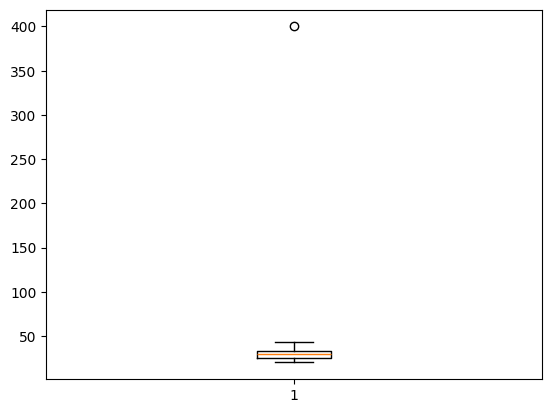

In [185]:
# visualização do outlier
# traço laranja é a mediana - 2º quartil
# bordas - inferior 3º quartil, superior é o 1º quartil
# os traços são os limites
# bolinha é o outlier
plt.boxplot(lista_idades)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c530eba72d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c530ed5f090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c530eba54d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c530ed5dbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c530ed5c290>],
 'means': []}

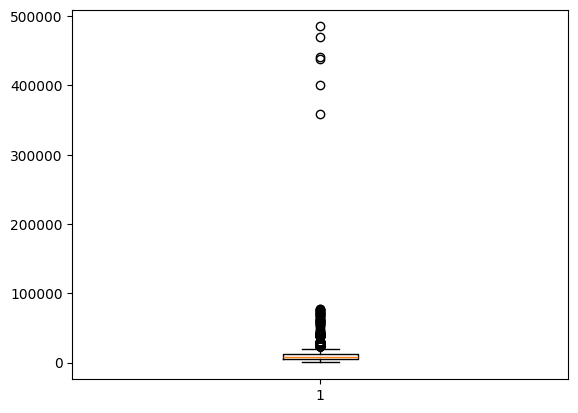

In [186]:
plt.boxplot(dados['SALARIO'])

In [187]:
q1 = dados['SALARIO'].quantile(0.25)
q1

np.float64(4751.5)

In [188]:
q3 = dados['SALARIO'].quantile(0.75)
q3

np.float64(11794.5)

In [189]:
#  (IQR): A distância entre o quartil superior e o quartil inferior. É uma medida de dispersão e indica onde está concentrada a “massa” dos dados.
iqr = q3 - q1
iqr

np.float64(7043.0)

In [190]:
# formam o intervalo de confiança
lim_superior = q3 + (1.5*iqr)
lim_superior

np.float64(22359.0)

In [191]:
# formam o intervalo de confiança
lim_inferior = q1 - (1.5*iqr)
lim_inferior

np.float64(-5813.0)

O limite superior indica 25542,00 o que estivesse acima disso poderia ser considerado outlier porém olhando nossa coluna de FAIXA SALARIAL sim existem pessoas que ganham acima desse valor.
Olhando o gráfico os valores também estão fora de contexto.

In [192]:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


Vamos calcular o outlier considerando o desvio padrão

In [193]:
media_salario = dados['SALARIO'].mean()
media_salario

np.float64(10517.53348162023)

In [194]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.210989118474

In [195]:
# o valor 3 pode ser 1, 2 a depender do contexto. Como aqui os outliers estão bem acima dos valores comuns de salário vamos usar 3
# acima desse valor é outlier
limite_superior = media_salario + (3*desvio_salario)
limite_superior

np.float64(64806.16644897565)

O que fazer com os dados, após identificar os valores discrepantes?
- remove-los: pode distorcer a interpretação dos dados<br>
- substitui-los: por valores mais adequados (mediana, limites)<br>
- mante-los: são importantes para a analise<br>

Importante considerar o contexto da analise.

In [196]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [197]:
# media dos que não são outliers
media_30_40 = dados[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_30_40

np.float64(39002.19402985075)

In [198]:
# localizar os outliers e substituir pela média da faixa_salarial a coluna Salario
dados.loc[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_30_40

In [199]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [200]:
media_40 = dados[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_40

np.float64(53127.846153846156)

In [201]:
dados.loc[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_40

In [202]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7c530ec5a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c530ec6ab10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c530ec220d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c530ee62510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c530ec00b50>],
 'means': []}

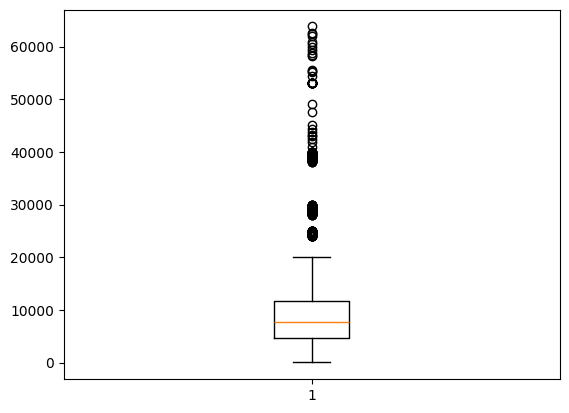

In [203]:
plt.boxplot(dados['SALARIO'])

### Distribuição amostral e intervalo de confiança


**Média Amostral**<br>
**Desvio Padrão** Amostral: nos mostra o quanto os salários variam em relação à média amostral.<br>
**Erro Padrão**: calculado dividindo o desvio padrão da amostra pela raiz quadrada do tamanho da amostra. Ele nos ajuda a entender a precisão da nossa média amostral como uma estimativa da média populacional.<br>
**Intervalo de Confiança**: pode variar geralmente usa-se 95%<br>
- Precisão: O intervalo de confiança nos dá uma faixa dentro da qual acreditamos que a média populacional se encontra, tornando nossa estimativa mais informativa do que uma única média amostral.
- Incerteza: Reconhece a incerteza inerente à amostragem e nos dá uma ideia de quanto essa incerteza pode ser.

In [204]:
# amostra
salarios = dados['SALARIO']

In [205]:
media_amostral = np.mean(salarios)
media_amostral

np.float64(9904.390109813306)

In [206]:
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579343

In [207]:
nivel_confianca = 0.95

In [208]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [209]:
erro_padrao = stats.sem(salarios)
erro_padrao

np.float64(127.11109872023638)

In [210]:
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(np.float64(9655.186295869078), np.float64(10153.593923757535))

Esse resultado significa que:<br>
De acordo com nossos dados, temos 95% de confiança que a média salarial de pessoas de dados no Brasil está entre 9655 a 10153 reais (na tendencia central - moda).<br>


### Feature engineering (engenharia de recursos)

 É o processo de criar novas variáveis (features/colunas)a partir dos dados existentes para melhorar a análise e a modelagem.<br>
 ➡️Criamos a coluna "NOVO_NIVEL" <br>
 ➡️Conversão de Variáveis Categóricas - útil para modelos de machine learning que requerem dados numéricos<br>
 ➡️Criação da Coluna "GERAÇÃO"

In [211]:
def preencher_nivel(gestor,nivel):
  if gestor==1:
    return 'Pessoa Gestora'
  else:
    return nivel

In [212]:
# aplicando a função a todas as linhas (axis=1) da tabela de dados
# x é a tabela
# criando uma nova coluna e adicionando ao dataframe
dados['NOVO NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [213]:
dados['NOVO NIVEL'].value_counts()

,count
NOVO NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


In [214]:
dados['NIVEL']

,NIVEL
0,Júnior
1,NaN
2,Pleno
3,Sênior
4,Pleno
...,...
4266,Pleno
4267,Pleno
4268,NaN
4269,Júnior


Conversão de variaveis categoricas em indicador - útil para modelos de machine learning que requerem dados numéricos



In [215]:
# Criar uma nova coluna a partir da coluna NIVEL para cada um dos niveis e nas linhas indicar True ou False de acordo com o nivel
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [216]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior'],
      dtype='object')

Transformar variaveis continuas em discretas <br>
Categorização em diferentes gerações com base na idade

In [217]:
def determinar_geracao(idade):
  if 39<idade<=58:
    return 'Geração X'
  elif 29<idade<=39:
    return 'Millenial'
  elif 13<idade<=29:
    return 'Geração Z'
  else:
    return 'Outra geração'

In [218]:
# aplicar função em uma coluna inteira
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [219]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


In [220]:
# visualizar novas colunas adicionadas:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO'],
      dtype='object')

Temos agora duas tabelas: a origem {dados} e a tabela com novas colunas {dados2}<br>
Vamos junta-las!

In [221]:
dados2 = pd.read_excel('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/Planilha_Aula_parte2.xlsx')

In [222]:
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [223]:
# juntando as tabelas
# on = que elas tem de semelhante
# how = o que vai juntar
# adicionamos a junção a tabela dados
dados = dados.merge(dados2, on='ID', how='left')

In [224]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [225]:
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


Transformar essa coluna em 2 outras novas, como por exemplo se a pessas está ou não buscando emprego <br>
- o que elas tem em comum é a palavra 'em busca'

In [226]:
# case vai colocar TRUE para a linha que contém e do contrario False
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [227]:
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [228]:
dados['ABERTO_OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [229]:
dados['ABERTO_OPORTUNIDADES'].value_counts()

,count
ABERTO_OPORTUNIDADES,
False,2342
True,1354


📌Com base no que aprendemos nas aulas de Featuring engineering, crie uma nova coluna de Etnia - brancas, não branca e outras

In [230]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2746
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


In [231]:
def determinar_etnia(etnia):
  if etnia== 'Branca':
    return 'Brancas'
  elif etnia == 'Parda' :
    return 'Não branca'
  elif etnia == 'Preta':
    return 'Não branca'
  elif etnia == 'Amarela':
    return 'Não branca'
  elif etnia == 'Indígena':
    return 'Não branca'
  else:
    return 'Outras'

In [232]:
dados['ETNIA'] = dados['COR/RACA/ETNIA'].apply(determinar_etnia)

In [233]:
dados['ETNIA'].value_counts()

,count
ETNIA,
Brancas,2746
Não branca,1484
Outras,43


# Correlação 👎 👍



Nos diz se e como duas variáveis estão relacionadas🤔. As variaveis podem estar positiva, negativamente relacionas ou ter relação alguma.<br>
➡️A correlação positiva ocorre quando duas variáveis aumentam juntas.

➡️Já a correlação negativa acontecia quando uma variável aumenta enquanto a outra diminui.<br><br>

📌A função de correlação mais usada é a de **Pearson**, que varia de -1 a 1. Um valor próximo de 1 indica uma forte correlação positiva, próximo de -1 indica uma forte correlação negativa, e próximo de 0 indica que não há uma relação linear.


In [235]:
# correlação de VALORES CONTINUOS
correlacao_continua = dados['IDADE'].corr(dados['SALARIO'])
correlacao_continua

np.float64(0.2902441968622099)

Há uma correlação positiva mas é bem mais próxima de 0 do que de 1, então não há uma correlação forte entre as var IDADE e SALARIO <br>

📌Entender a correlação ajuda a evitar suposições.

Para identificar correlações em tabelas com muitas colunas de valores contínuos, utilizamos mapas de calor. Um exemplo de mapa de calor permite visualizar rapidamente a correlação entre variáveis contínuas, com cores indicando a força da correlação.

In [236]:
# correlação de VALORES DISCRETOS
# chi2 = chiquadrado
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = pd.crosstab(coluna1, coluna2)
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [237]:
# visualizando apenas a tabela que correlaciona as duas var
tabela_cruzada = np.array(pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO']))
tabela_cruzada

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

In [238]:
# visualizar apenas a matriz, os valores da tabela_cruzada
np.array(tabela_cruzada)

array([[  7,  15,  50,  14,   2,   0,  40],
       [127, 365, 999, 355,  65,   8, 827],
       [  0,   2,   4,   2,   0,   0,   3],
       [  0,   0,   6,   3,   1,   0,   7],
       [ 50, 178, 333, 113,  33,   3, 344],
       [  1,   2,  14,   1,   0,   1,   7],
       [  6,  51, 104,  33,   9,   0,  88]])

Cramer é o valor do Chi2 normalizado entre 0 (menor relação) e 1 (maior relação)

In [239]:
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
NIVEL DE ENSINO,
Doutorado ou Phd,0.212802
Estudante de Graduação,0.118785
Graduação/Bacharelado,0.075684
Mestrado,0.128847
Não tenho graduação formal,0.280412
Prefiro não informar,0.848989
Pós-graduação,0.081071


Olhando o resultado percebemos que praticamente não há relação entre as variaveis.<br>
Este resultado sugere que, na nossa amostra, etnias diferentes têm níveis de ensino semelhantes, possivelmente devido ao contexto da área de TI, onde a maioria já tem algum tipo de formação.

📌Faça a correlação entre nível de ensino e gênero😁

In [240]:
cramer_coeficiente(dados['GENERO'], dados['NIVEL DE ENSINO'])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
NIVEL DE ENSINO,
Doutorado ou Phd,0.360035
Estudante de Graduação,0.200970
Graduação/Bacharelado,0.128048
Mestrado,0.217993
Não tenho graduação formal,0.474422
Prefiro não informar,1.436383
Pós-graduação,0.137162


In [241]:
# Salvar os dados
# index=False para não gerar coluna de indice na tabela
dados.to_csv('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/analise_dados_dataHacker.csv', index=False)

# Conectando SQL com Pandas 📘




In [242]:
# criando conexão com o banco de dados
conexao = sqlite3.connect('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/db_status_brasil')

In [243]:
# consulta SQL armazenada em uma string
query = "SELECT * FROM Municipios_Brasileiros WHERE Cidade = 'Santos';"

In [244]:
query

"SELECT * FROM Municipios_Brasileiros WHERE Cidade = 'Santos';"

In [245]:
# usando pandas para realizar as consultas ao BD
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Santos,SP,Sudeste,5321


In [246]:
# leitura do arquivo com toda a analise da pesquisa dataHackers
dados = pd.read_csv('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/analise_dados_dataHacker.csv')

In [247]:
# listar coluna de Estados ÚNICOS desse arquivo(tabela)
# não temos todos os estados brasileiros!
lista_estados = list(dados['UF ONDE MORA'].unique())

In [248]:
# JOIN - GROUP BY
# agrupamento por Estado com a média do índice de renda
# usando somente os estados que estão na tab de resultados da analise anterior (lista_estados) com o IN
query = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.renda) AS renda_media FROM Municipios_Brasileiros
           INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
           WHERE Municipios_Brasileiros.Estado IN ({})
           GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))

In [249]:
print(query)

SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.renda) AS renda_media FROM Municipios_Brasileiros
           INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
           WHERE Municipios_Brasileiros.Estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
           GROUP BY Municipios_Brasileiros.Estado;


In [250]:
estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)

In [251]:
# renomeando a coluna 'UF ONDE MORA'
dados.rename(columns={'UF ONDE MORA':'Estado'}, inplace=True)

In [252]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [253]:
# Merge com a tabela original:
# fazendo merge entre as duas colunas de nome Estado das tabelas 'dados' e 'estados_renda' deixando os dados da coluna da esquerda (dados)
# how tem regras semelhantes ao JOIN do SQL
dados = dados.merge(estados_renda, on='Estado', how='left')

In [254]:
# foi adicionada a coluna de renda_media
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [255]:
# correlação de renda e salário
correlacao_renda_salario = dados['SALARIO'].corr(dados['renda_media'])
correlacao_renda_salario

np.float64(0.12083384881429463)

a correlação é positiva, quando maior o índice, maior o salário, porém baixa, mostrando que só esse índice não causa um impacto tão grande para o salário, precisamos analisar juntando outras variáveis de importância.

📌Faça a mesma análise utilizando o índice de educação. Existe alguma correlação com salário?

In [257]:
query = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipios_Status.educacao) FROM Municipios_Brasileiros
           INNER JOIN Municipios_Status ON Municipios_Brasileiros.municipio_ID = Municipios_Status.municipio_ID
           WHERE Municipios_Brasileiros.Estado IN ({})
           GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))

In [258]:
estados_educacao = pd.read_sql(query, con=conexao, params=lista_estados)

In [259]:
dados = dados.merge(estados_educacao, on='Estado', how='left')

In [260]:
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [261]:
# correlação de educação e salário
correlacao_educacao_salario = dados['SALARIO'].corr(dados['AVG(Municipios_Status.educacao)'])
correlacao_educacao_salario

np.float64(0.15558020288268756)

# Visualização de Dados 🔹

In [262]:
import pandas as pd

In [263]:
dados = pd.read_csv('/content/drive/MyDrive/Manuais_Estudos/Dados/programaria/analise_dados.csv')

In [264]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO,NOVA_ETNIA
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,Não branca
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,Não branca
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,Branca
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0,False,True,Branca
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,Branca


In [265]:
genero_counts = dados['GENERO'].value_counts() #faz a contagem por genero

In [266]:
genero_counts

,count
GENERO,
Masculino,3194
Feminino,1058
Prefiro não informar,21


In [267]:
import matplotlib.pyplot as plt

# Para que os gráficos sejam mostrados logo abaixo das células e
# armazenados com o notebook, usamos o comando mágico:
%matplotlib inline

#### Gráfico de barras

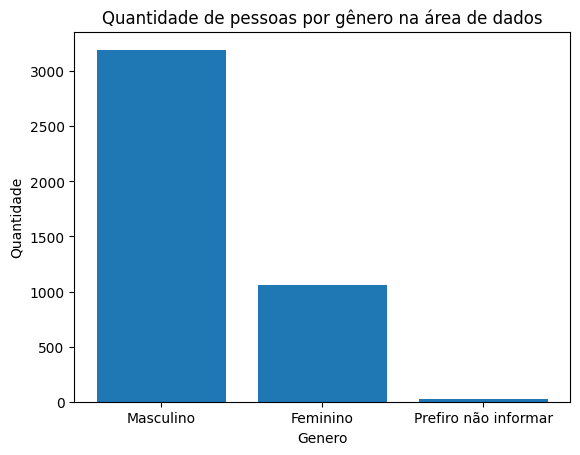

In [268]:
plt.figure() # primeiro criar uma figura para o gráfico, janela
plt.bar(height=genero_counts.values, x=genero_counts.index) #gráfico de barras, height=valores, x=label
plt.title('Quantidade de pessoas por gênero na área de dados')  #titulo
#eixos
plt.xlabel('Genero')
plt.ylabel('Quantidade')
plt.show() #mostrar o gráfico

Avaliando a escala dos eixos podemos dizer que a proporção de pessoas do genero masculino é 3x maior que a de genero feminino. <br>
Mais homens responderam à pesquisa do que mulheres, o que nos faz inferir que existem mais homens na área de dados. Conseguimos com esse gráfico cumprir as 2 regras dos 5 segundos, criando um gráfico com Clareza e Eficiência.

In [269]:
import seaborn as sns

<ipython-input-270-0bfa2f7e3e8e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= dados, x='GENERO', palette= 'bright')


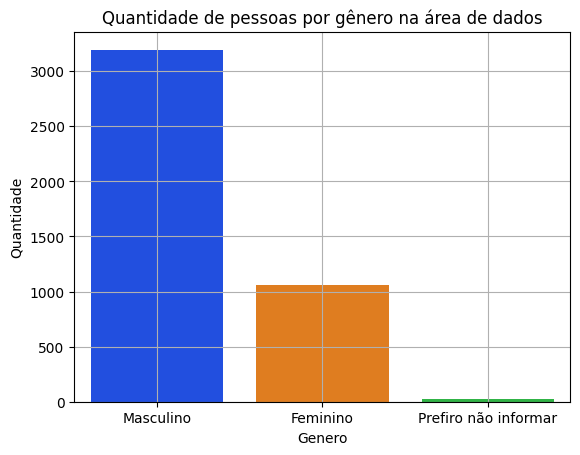

In [270]:
plt.figure()
sns.countplot(data= dados, x='GENERO', palette= 'bright')
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Genero')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

In [271]:
#Visualizar média de salário pot idade
salario_por_idade = dados.groupby('IDADE')['SALARIO'].mean()

In [272]:
salario_por_idade

,SALARIO
IDADE,
18.0,4230.307692
19.0,4519.590909
20.0,4778.384615
21.0,4578.737179
22.0,4394.689815
23.0,5602.406897
24.0,6151.622449
25.0,7616.392336
26.0,7700.071174


#### Gráfico de linha

<function matplotlib.pyplot.show(close=None, block=None)>

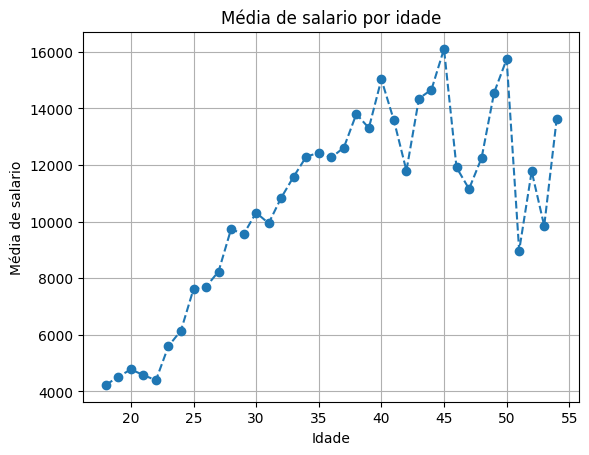

In [273]:
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker= 'o', linestyle='--') #index=rotulos, idades. values=o que preenche o eixo y, media idades. marker=marcador, intersecção.
plt.xlabel('Idade')
plt.ylabel('Média de salario')
plt.title('Média de salario por idade')
plt.grid(True)
plt.show

In [274]:
import plotly.express as px

In [275]:
# variavel que recebe o gráfico
# nome dos eixos tem que ser igual ao das colunas
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO', title='Média de salarios por idade', markers=True)
fig.show()

#### Gráfico tipo Scatterplot

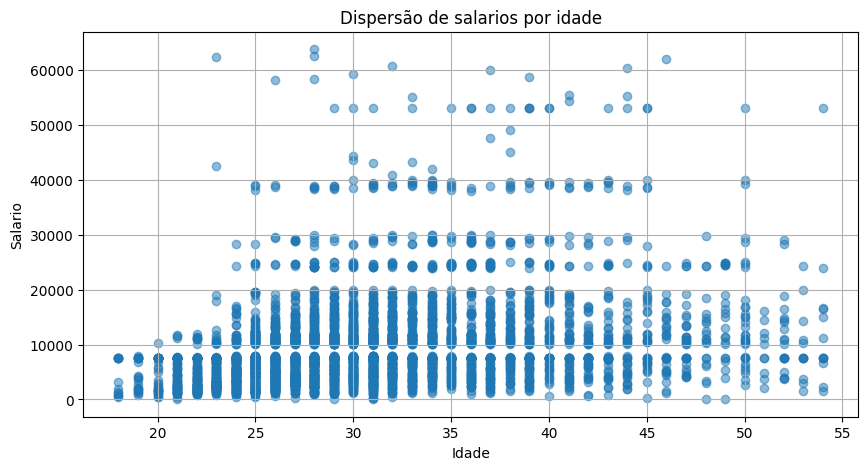

In [276]:
plt.figure(figsize=(10,5)) # tamanho da janela do grafico
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)  #alpha = define a transparencia dos pontos
plt.xlabel('Idade')
plt.ylabel('Salario')
plt.title('Dispersão de salarios por idade')
plt.grid(True)
plt.show()

In [277]:
# Usando a biblioteca Plotly
fig = px.scatter(dados, x='IDADE', y='SALARIO', title='Dispersão de salarios por idade')
fig.show()

A relação entre salário e idade. Apesar de que olhando pela média dos salários pelo gráfico de linha eles parecem crescer com a idade, quando olhando a distribuição dos pontos pelo scatterplot percebemos que na verdade depois dos 25 a maioria das pessoas recebe mais ou menos na mesma faixa salarial (20K). A maior parte dos respondentes são de pessoas mais jovens. Isso nos mostrou que às vezes vale olhar os mesmos dados de diferentes óticas para obtermos uma conclusão mais correta.